In [ ]:
import numpy as np
import sklearn
from scipy.interpolate import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.vecm import *
from statsmodels.tsa.vector_ar import *
import math
from statistics import *

In [ ]:
df = pd.read_csv("cleancpi1.csv")

# tr = df[(df['GEO'] == 'Toronto, Ontario') & (df['VECTOR'] == 'v41692890')]
df = df.drop(columns = 'TERMINATED')
tr = df[df['GEO'] == 'Toronto, Ontario']
tr.head()
# idx = {'REF_DATE': '2000-02'}

,Unnamed: 0,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,VECTOR,COORDINATE,VALUE
132,504876,2000-02,"Toronto, Ontario",2011S0503535,All-items,2002=100,17,v41692888,16.20,93.9
133,504877,2000-02,"Toronto, Ontario",2011S0503535,Shelter,2002=100,17,v41692889,16.79,92.9
134,504878,2000-02,"Toronto, Ontario",2011S0503535,Rented accommodation,2002=100,17,v41692890,16.80,94.2
135,504879,2000-02,"Toronto, Ontario",2011S0503535,Owned accommodation,2002=100,17,v41692891,16.84,93.3
136,504880,2000-02,"Toronto, Ontario",2011S0503535,"Water, fuel and electricity",2002=100,17,v41692892,16.91,88.5


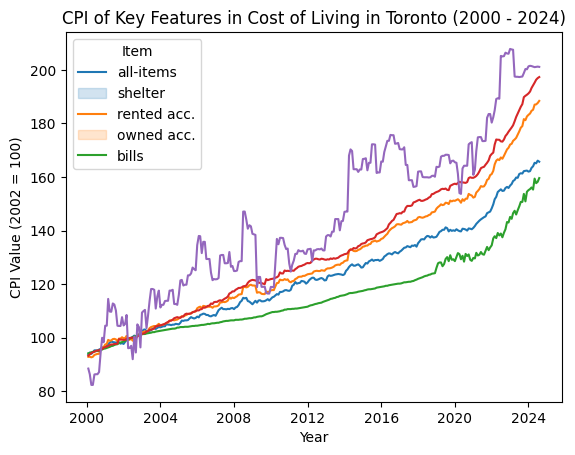

In [ ]:
# ri = tr[['REF_DATE', 'VALUE']]
ti = tr.loc[:, ['REF_DATE', 'VALUE', 'VECTOR']]
ti['REF_DATE'] = pd.to_datetime(ti['REF_DATE'], yearfirst= True)
ti.head()
p1 = sns.lineplot(x = 'REF_DATE', y = 'VALUE', data = ti, hue = 'VECTOR')
# sns.kdeplot(x = ri.index, y = 'VALUE', data = ri)
p1.set(xlabel = "Year", ylabel = "CPI Value (2002 = 100)", title = 'CPI of Key Features in Cost of Living in Toronto (2000 - 2024)')
p1.legend(title = "Item", labels = ['all-items', 'shelter', 'rented acc.', 'owned acc.', 'bills'])

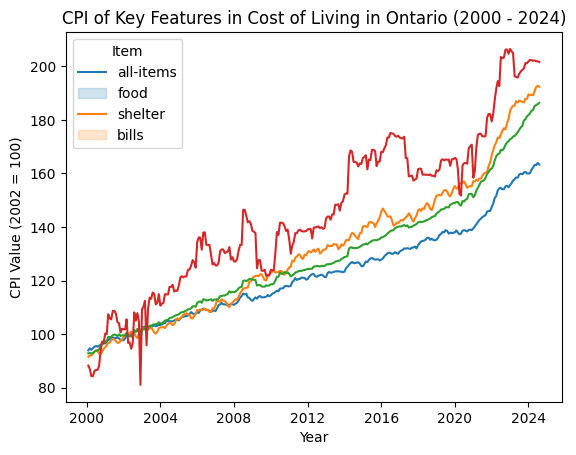

In [ ]:
on = df[df['GEO'] == 'Ontario']
oi = on.loc[:, ['REF_DATE', 'Products and product groups', 'VECTOR', 'VALUE']]
oi['REF_DATE'] = pd.to_datetime(oi['REF_DATE'], yearfirst= True)
# ocs = ['v41691919', 'v41691920', 'v41691951', 'v41691952', 'v41691953', 'v41691954', 'v41691960', 'v41691972',
#       'v41691999', 'v41692004', 'v41692021', 'v41692003', 'v41692043', 'v41692039', 'v41691967', 'v41691968']

ocs = ['v41691919', 'v41691920', 'v41691952', 'v41691960']
oi = oi[oi['VECTOR'].isin(ocs)]

p2 = sns.lineplot(x = 'REF_DATE', y = 'VALUE', data = oi, hue = 'VECTOR')
p2.set(xlabel = "Year", ylabel = "CPI Value (2002 = 100)",
       title = 'CPI of Key Features in Cost of Living in Ontario (2000 - 2024)')
p2.legend(title = "Item", labels = ['all-items', 'food', 'shelter', 'bills'])

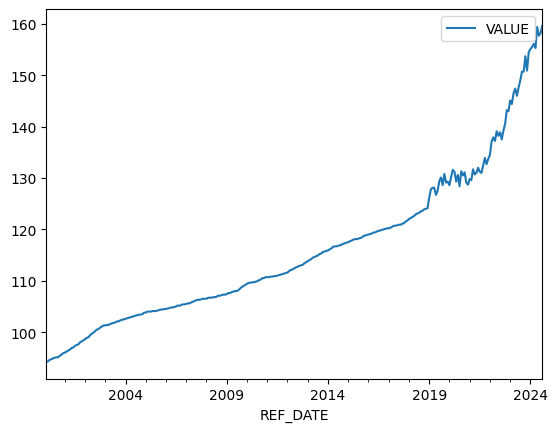

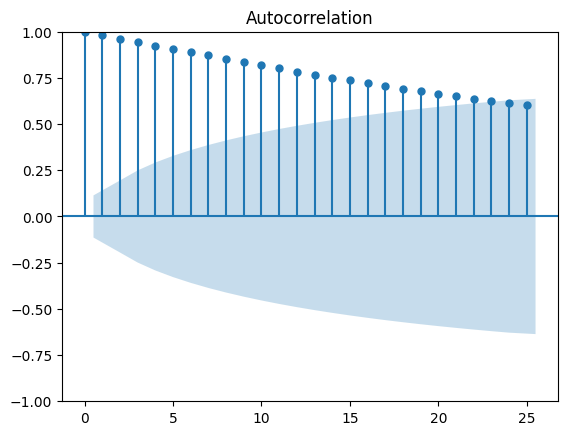

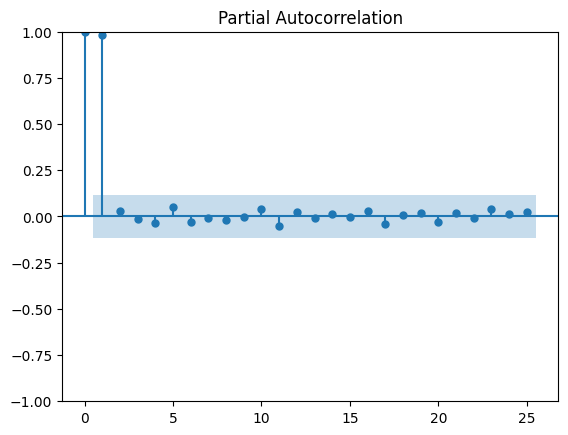

In [ ]:
rents = ti[ti['VECTOR'] == 'v41692890']
rents.drop(columns = 'VECTOR')

# rents.plot()
rents.plot('REF_DATE', 'VALUE')
racf = plot_acf(rents['VALUE'])
rpacf = plot_pacf(rents['VALUE'])

(-4.7612045211089224,
 6.44828610663375e-05,
 15,
 277,
 {'1%': -3.4541800885158525,
  '5%': -2.872031361137725,
  '10%': -2.5723603999791473},
 536.3507259599214)

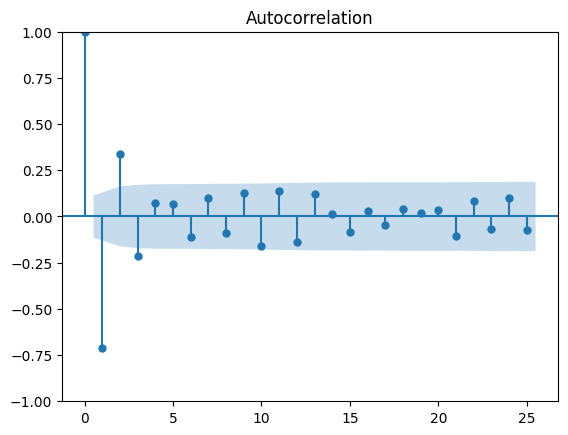

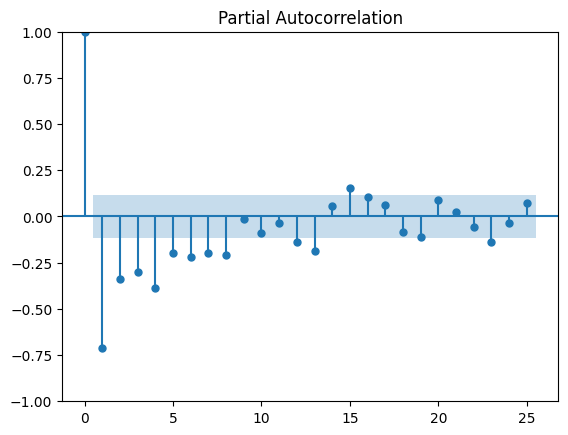

In [ ]:
rd = rents['VALUE']
rdd = rd.diff().diff().dropna()
d1acf = plot_acf(rdd)
d1pacf = plot_pacf(rdd)

adfuller(rdd)
# ts is stationary

time series for edited cpi dataframe

In [ ]:
cpidf = pd.read_excel('curdf1.xlsx')
cpidf['REF_DATE'] = pd.to_datetime(cpidf['REF_DATE'])

cpidf.set_index('REF_DATE')
# tmp = cpidf.drop(columns = 'REF_DATE')
# tmp = cpidf.tail(-1)

# ttdf = cpidf.drop(columns = 'REF_DATE')
cpidf = cpidf.tail(-1)



itrn = math.floor(260*0.8)
itst = 260 - itrn

# ttdf.head()
# print(itrn)
trn = cpidf.iloc[:itrn]
tst = cpidf.iloc[itrn:]

ival = math.floor(0.8*itrn)
trnv = cpidf.iloc[:ival]
val = cpidf.iloc[ival:]

ttst = tst.drop(columns = 'REF_DATE')

# cpidf.head()



In [ ]:
# for i in list(tmp.columns):
# #     print(adfuller(tmp[i]))
#     plot_acf(tmp[i])
#     plot_pacf(tmp[i])


# list(tmp.columns)
# ['v41691920','v41691968','v41692000','v41692001','v41692002', 'v41692004','v41692027','v41692890','v41692892','v41693222']

# adfuller(tmp['v41691920'])

# 'v41692890' 'v41692004'

# for i in list(tmp.columns):
#     print(adfuller(tmp[i]))
tmp = cpidf.drop(columns = ['REF_DATE'])

# cdiff = tmp.diff(periods = 1).dropna()
# cdiff.isnull().sum()

# cdiff.head()
# adfuller(cdiff['v41691920'])
# for i in list(cdiff.columns):
#     print(adfuller(cdiff[i]))

# for i in list(cdiff.columns):
#     plot_acf(cdiff[i])
#     plot_pacf(cdiff[i])

for i in list(tmp.columns):
    print(adfuller(tmp[i]))

(1.6524474091431343, 0.99800669554266, 16, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 571.5843495283573)
(-0.4892220589631794, 0.8941026341116594, 10, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 1072.8506251008387)
(-1.4242680173777802, 0.5705880277098528, 6, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, 724.9203034808797)
(-1.0079029245568967, 0.750370988486422, 6, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, 844.1344197650201)
(-2.0410349155186776, 0.2688754504858487, 6, 253, {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}, 777.0926493723587)
(2.817061290726761, 1.0, 1, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%': -2.572774990685656}, 469.8937890783053)
(0.07542564753334924, 0.9643426813265586, 1, 258, {'1%': -3.455952927706342, '5%': -2.8728086526320302, '10%'

In [ ]:
col1 = np.log(tmp.iloc[:,0]).diff(periods = 24).diff().dropna()
# plot_acf(col1)
# plot_pacf(col1)

# adfuller(col1)

# c1 = tmp.iloc[:,0]
# adfuller(c1)
# plot_acf(c1)
# plot_pacf(c1)


# 8? 4? 5? 6?
col2 = np.log(tmp.iloc[:,1]).diff(periods = 1).dropna()
# plot_acf(col2)
# plot_pacf(col2)

# adfuller(col2)


col3 = np.log(tmp.iloc[:,2]).diff(periods = 1).dropna()
# plot_acf(col3)
# plot_pacf(col3)

# adfuller(col3)


col4 = np.log(tmp.iloc[:,3]).diff(periods = 1).dropna()
# plot_acf(col4)
# plot_pacf(col4)

# adfuller(col4)


col5 = np.log(tmp.iloc[:,4]).diff(periods = 24).diff().dropna()
# plot_acf(col5)
# plot_pacf(col5)

# adfuller(col5)



col6 = np.log(tmp.iloc[:,5]).diff(periods = 12).diff().dropna()
# plot_acf(col6)
# plot_pacf(col6)

# adfuller(col6)


col7 = np.log(tmp.iloc[:,6]).diff().dropna()
# plot_acf(col7)
# plot_pacf(col7)

# adfuller(col7)







# plt.plot(tmp.iloc[:,7])


col9 = np.log(tmp.iloc[:,8]).diff(1).dropna()
# plot_acf(col9)
# plot_pacf(col9)

# adfuller(col9)


col10 = np.log(tmp.iloc[:,9]).diff().dropna()
# plot_acf(col10)
# plot_pacf(col10)

# adfuller(col10)


## only non stationary with regular differencing

# 'v41692890' 'v41692004'

# col8 = tmp['v41692004'].diff(periods = 4).diff().dropna()
# plot_acf(tmp['v41692004'])
# plot_acf(col8)
# plot_pacf(col8)

# adfuller(col8)


col8 = np.log(tmp.iloc[:,7]).diff(periods = 4).diff().dropna()
# plot_acf(col8)
# plot_pacf(col8)

# adfuller(col8)




lall = np.log(tmp)
lall.loc[:, 0] = col1
lall.loc[:, 1] = col2
lall.loc[:, 2] = col3
lall.loc[:, 3] = col4
lall.loc[:, 4] = col5
lall.loc[:, 5] = col6
lall.loc[:, 6] = col7
lall.loc[:, 7] = col8
lall.loc[:, 8] = col9
lall.loc[:, 9] = col10

# lall.dropna()
lall.shape

(260, 20)

In [ ]:
ttrn = trn.drop(columns = 'REF_DATE')
tcol1 = np.log(ttrn.iloc[:,0]).diff(periods = 12).diff().dropna()
# plot_acf(tcol1)
# plot_pacf(tcol1)

# adfuller(tcol1)


tcol2 = np.log(ttrn.iloc[:,1]).diff(periods = 12).diff().dropna()
# plot_acf(tcol2)
# plot_pacf(tcol2)

# adfuller(tcol2)



tcol3 = np.log(ttrn.iloc[:,2]).diff(periods = 12).diff().dropna()
# plot_acf(tcol3)
# plot_pacf(tcol3)

# adfuller(tcol3)



tcol4 = np.log(ttrn.iloc[:,3]).diff(periods = 12).diff().dropna()
# plot_acf(tcol4)
# plot_pacf(tcol4)

# adfuller(tcol4)



tcol5 = np.log(ttrn.iloc[:,4]).diff(periods = 12).diff().dropna()
# plot_acf(tcol5)
# plot_pacf(tcol5)

# adfuller(tcol5)



tcol6 = np.log(ttrn.iloc[:,5]).diff(periods = 1).dropna()
# plot_acf(tcol6)
# plot_pacf(tcol6)

# adfuller(tcol6)



tcol7 = np.log(ttrn.iloc[:,6]).diff(periods = 12).diff().dropna()
# plot_acf(tcol7)
# plot_pacf(tcol7)

# adfuller(tcol7)


tcol8 = np.log(ttrn.iloc[:,7]).diff(periods = 1).dropna()
# plot_acf(tcol8)
# plot_pacf(tcol8)

# adfuller(tcol8)



tcol9 = np.log(ttrn.iloc[:,8]).diff(periods = 1).dropna()
# plot_acf(tcol9)
# plot_pacf(tcol9)

# adfuller(tcol9)


tcol10 = np.log(ttrn.iloc[:,9]).diff(periods = 12).diff().dropna()
# plot_acf(tcol10)
# plot_pacf(tcol10)

# adfuller(tcol10)



ltrn = np.log(ttrn)
ltrn.loc[:, 0] = tcol1
ltrn.loc[:, 1] = tcol2
ltrn.loc[:, 2] = tcol3
ltrn.loc[:, 3] = tcol4
ltrn.loc[:, 4] = tcol5
ltrn.loc[:, 5] = tcol6
ltrn.loc[:, 6] = tcol7
ltrn.loc[:, 7] = tcol8
ltrn.loc[:, 8] = tcol9
ltrn.loc[:, 9] = tcol10
# ltrn = ltrn.dropna()

# ltrn.shape
# ltrn = ltrn.dropna()
# ltrn.shape

VAR models

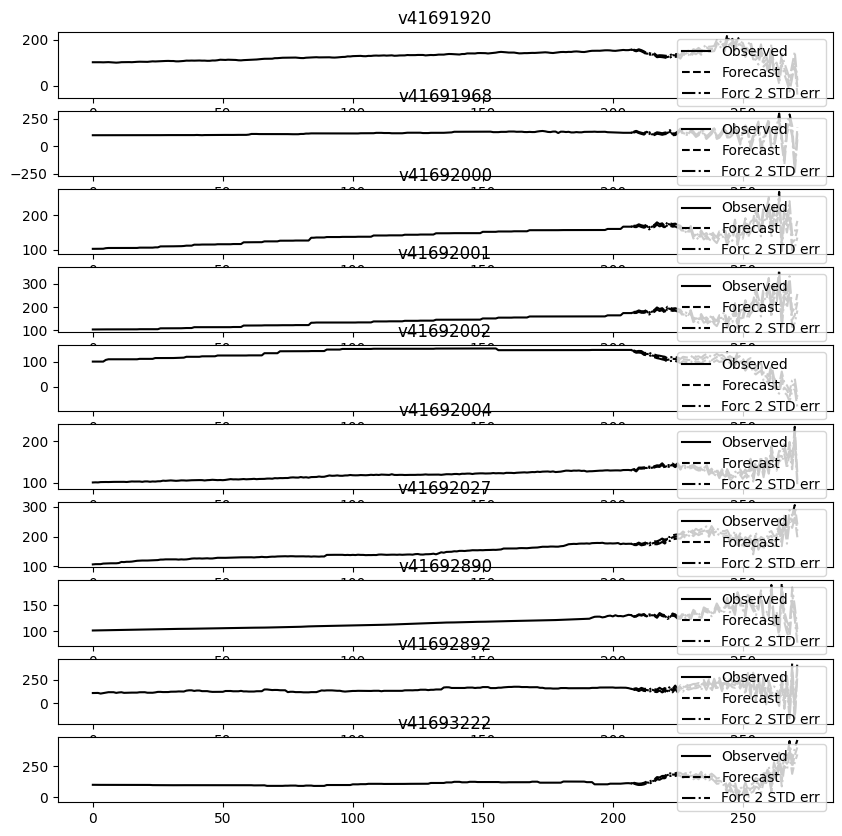

In [ ]:
# tvrm1 = VAR(endog = ltrn)
# tres1 = tvrm1.select_order(1)
# tres1.summary()
# ltrn.head()
# lall.head()

tvrm1 = VAR(endog = ttrn)
tres1 = tvrm1.select_order(1)
tres1.summary()

tvrfit = tvrm1.fit(maxlags = 12)
tvrfit.summary()

nobs = 208
lagtvr = tvrfit.k_ar
# print(lagtvr)
tvrfc = tvrfit.forecast(y = ttrn.values[-lagtvr:], steps = itst)
tvrfc = (pd.DataFrame(tvrfc, index=ttst.index, columns=ttst.columns + '_pred'))
# print(tvrfc)

def invert_transformation(X_train, pred_df):
    forecast = tvrfc.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col) +'_pred'].cumsum()
        return forecast
vroutput = invert_transformation(ttrn, tvrfc)
# output = np.exp(output)
# print(output)




# vroutput.head()

futfc = tvrfit.plot_forecast(steps = itst + 12)

# futfc.plot_forecast()

# # output['v41691920_pred'][itrn + 1]
# # ttst.head()
# # ttst['v41691920'].values[1]

In [ ]:
def quickMSE(preds, nlg):

    def ferr_lst(col, fc):
        errlst = []

        for j in range(itst):
            if nlg:
                ferr = np.log(ttst[col].values[j]) - fc[col +'_pred'][j + itrn + 1]
                errlst.append(np.exp(ferr))
            else:
                ferr = ttst[col].values[j] - fc[col +'_pred'][j + itrn + 1]
                errlst.append(ferr)

        return errlst

    elst = []
    for col in list(ttst.columns):
        fes = ferr_lst(col, preds)
        mse = mean([x**2 for x in fes])
        elst.append(mse)

    return elst

quickMSE(vroutput, True)

# mse = functools.reduce(lambda x,y: x^2/itst + y^2/itst, a)
# elst

# ttst['v41691920'].values[1]

# errlst = []
# for i in range(itst):
#     err = ttst['v41691920'].values[i] - output['v41691920_pred'][i + itrn + 1]
#     errlst.append(np.exp(err))

# print(errlst)

[1.245334855133525e-268,
 5.414587054092981e+21,
 1.1396517940298284e-105,
 9.721089063634375e-105,
 7.273092749036866e-33,
 8.807380015899411e-94,
 3.1676385526523777e-131,
 1.0481634047893155e-106,
 9.068475335688959e-26,
 5.1030913358776446e-08]

VECM models

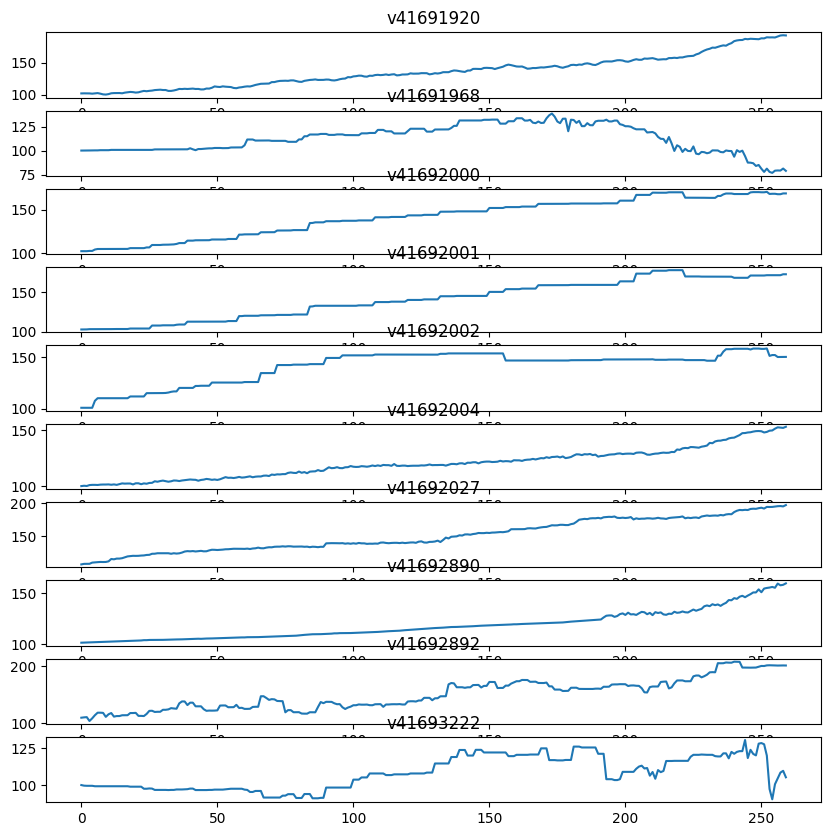

In [ ]:
# ['v41691920','v41691968','v41692000','v41692001','v41692002', 'v41692004','v41692027','v41692890','v41692892','v41693222']

# g12 = grangercausalitytests(tmp[['v41691968', 'v41691920']], 20)
# lag_order = select_order(data=cpidf, maxlags=4, deterministic="ci", )
# lag_order.summary()

# model = VECM(data, diff_lags=3, coint_rank=1)
# vecm_res = model.fit()


ranktrn = select_coint_rank(tmp, 0, 1, method = "trace", signif = 0.05)
ranktrn.rank

lotmp = vecm.select_order(tmp, maxlags = 24, deterministic = "ci")
lotmp.summary()

model1 = VECM(tmp, k_ar_diff=1, coint_rank=ranktmp.rank, seasons = 12)
vecm1_res = model1.fit()
vecm1_res.plot_data(with_presample=True)





model2 = VECM(tmp, k_ar_diff=1, coint_rank=ranktrn.rank, seasons = 12)
vecm2_res = model1.fit()
# vecm1_res.plot_data(with_presample=True)


In [ ]:
# vecm1_res.summary()

# vecm1_res.predict(steps=6)
# vecm_res.plot_forecast(steps = 6)

vecm1_res.predict(steps=12)
# vecm1_res.plot_forecast(steps = 12)



array([[191.96041858,  78.76399583, 168.46329325, 172.42746821,
        150.4770684 , 153.72901028, 196.97206298, 160.04839137,
        201.62255419, 104.86147329],
       [192.45982893,  78.94400684, 168.63733228, 172.58071751,
        150.46235533, 154.01264336, 197.3404604 , 161.10350099,
        200.78729085, 104.75219736],
       [194.28295022,  77.99215049, 168.94995629, 172.94982292,
        150.39775607, 154.56854154, 197.81904636, 161.44539384,
        201.17050366, 104.46512482],
       [195.44321949,  76.50293663, 169.05437243, 173.06089196,
        150.31225362, 154.70099473, 197.94436228, 162.23441384,
        201.57471105, 104.52563148],
       [197.23618766,  77.30832458, 170.75881063, 175.01267631,
        151.06841748, 155.25445404, 198.981269  , 163.07100421,
        202.40247816, 103.78260051],
       [198.32189772,  77.37434497, 170.73932189, 175.11543251,
        150.6428636 , 155.99052403, 199.76682534, 163.93306239,
        203.24160781, 102.1946505 ],
       [19

In [ ]:
ranktrn = select_coint_rank(ttrn, 0, 1, method = "trace", signif = 0.01)
ranktrn.rank

lotrn = vecm.select_order(ttrn, maxlags = 24, deterministic = "ci")
lotrn.summary()


model3 = VECM(ttrn, k_ar_diff=24, coint_rank=ranktrn.rank, seasons = 12)
vecm3_res = model3.fit()
# vecm3_res.plot_data(with_presample=True)

vc = vecm3_res.predict(itst)
# vecm3_res.plot_forecast(steps = itst, n_last_obs = itst)

vcm = pd.DataFrame(vc, columns = list(vroutput.columns))
# print(vcm)

# quickMSE(vcm, False)
vcm.head()

# el = []


# for j in range(itst):
# #     ferr = ttst['v41691920'].values[j] - vcm['v41691920_pred'][j]
#     ferr = ttst['v41691920'].values[j] - vroutput['v41691920_pred'][j + itrn + 1]
#     el.append(ferr)

# # el
# for l in list(ttst.columns):
#         fes = ferr_lst(col, preds)
#         mse = mean([x**2 for x in fes])
#         elst.append(mse)



def vcMSE(preds):

    def ferror_lst(c, fc):
        errlst = []

        for k in range(itst):
                errf = ttst[col].values[k] - fc[col +'_pred'][k]
                errlst.append(errf)

        return errlst

    elst = []
    for col in list(ttst.columns):
        fes = ferror_lst(col, preds)
        mse = mean([x**2 for x in fes])
        elst.append(mse)

    return elst

vcMSE(vcm)

[4.250637761493918e+157,
 6.214607632175937e+158,
 1.0735745731218128e+159,
 4.398763005224346e+158,
 1.442267753014064e+158,
 1.224231811817919e+158,
 2.3563887732879874e+158,
 6.454330950293414e+157,
 1.3986436257699265e+159,
 3.4680171901152096e+159]